**Machine learning project**

In [ ]:
##LINEAR REGRESSION

In [ ]:
##Load Data

import pandas as pd

df = pd.read_csv('https://github.com/dataprofessor/data/raw/master/delaney_solubility_with_descriptors.csv')

df.head()


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [ ]:
## Data Prepration

x = df.drop('logS', axis=1)
y = df['logS']

x,y

(      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
 0     2.59540  167.850                0.0            0.000000
 1     2.37650  133.405                0.0            0.000000
 2     2.59380  167.850                1.0            0.000000
 3     2.02890  133.405                1.0            0.000000
 4     2.91890  187.375                1.0            0.000000
 ...       ...      ...                ...                 ...
 1139  1.98820  287.343                8.0            0.000000
 1140  3.42130  286.114                2.0            0.333333
 1141  3.60960  308.333                4.0            0.695652
 1142  2.56214  354.815                3.0            0.521739
 1143  2.02164  179.219                1.0            0.461538
 
 [1144 rows x 4 columns],
 0      -2.180
 1      -2.000
 2      -1.740
 3      -1.480
 4      -3.040
         ...  
 1139    1.144
 1140   -4.925
 1141   -3.893
 1142   -3.790
 1143   -2.581
 Name: logS, Length: 1144, dtype: float64)

In [ ]:
## spliting data into test and train
from sklearn.model_selection import train_test_split


train_x , test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=100)

In [ ]:
train_x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
test_x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [ ]:
## model building
## linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [ ]:
## predicting values
y_lr_train_preds = lr.predict(train_x)
y_lr_test_preds = lr.predict(test_x)

In [ ]:
## evaluating model performance

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(train_y, y_lr_train_preds)
lr_train_r2 = r2_score(train_y,y_lr_train_preds)

lr_test_mse = mean_squared_error(test_y, y_lr_test_preds)
lr_test_r2 = r2_score(test_y,y_lr_test_preds)

lr_train_mse,lr_train_r2
#lr_test_mse,lr_test_r2

(1.0075362951093687, 0.7645051774663391)

In [ ]:
##RANDOM FOREST

In [ ]:
#Training the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)

rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
#predicting the values

y_rf_train_preds = rf.predict(train_x)
y_rf_test_preds = rf.predict(test_x)


In [ ]:
#evaluating performance

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_rf_train_preds,train_y)
rf_test_mse = mean_squared_error(y_rf_test_preds,test_y)

rf_train_r2 = r2_score(y_rf_train_preds,train_y)
rf_test_r2 = r2_score(y_rf_test_preds,test_y)


a = [rf_train_mse,rf_train_r2]
b = [rf_test_mse,rf_test_r2]

print(a,b)

[1.028227802112806, 0.6559206343354353] [1.407688264904896, 0.5618520362791575]


In [ ]:
lr_result = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2, lr_test_mse,lr_test_r2]).transpose()
lr_result.columns = [ 'Method', 'Train Mse', 'Train r2', 'Test Mse', 'Test r2']
lr_result

,Method,Train Mse,Train r2,Test Mse,Test r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [ ]:
rf_result = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2, rf_test_mse,rf_test_r2]).transpose()
rf_result.columns = [ 'Method', 'Train Mse', 'Train r2', 'Test Mse', 'Test r2']
rf_result

,Method,Train Mse,Train r2,Test Mse,Test r2
0,Random Forest,1.028228,0.655921,1.407688,0.561852


In [ ]:
results = pd.concat([lr_result,rf_result], axis = 0)
results = results.reset_index(drop=True)
results

,Method,Train Mse,Train r2,Test Mse,Test r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.655921,1.407688,0.561852


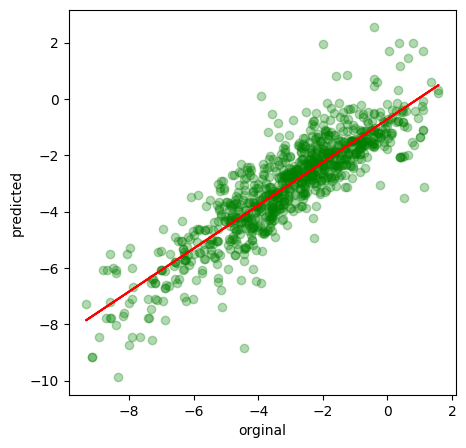

In [ ]:
## data visualization
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (5,5))
plt.scatter(x=train_y, y = y_lr_train_preds,c='green', alpha=0.3)
plt.xlabel('orginal')
plt.ylabel('predicted')

z = np.polyfit(train_y,y_lr_train_preds,1 )
p = np.poly1d(z)


plt.plot(train_y, p(train_y), 'red')